In [6]:
# Importing the required libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Load the dataset
df = pd.read_csv('predictive_maintenance.csv')

# Drop the Product ID column from the dataset
df = df.drop('Product ID', axis=1)

print(df['Type'].unique())
print(df['Failure Type'].unique())


# convert categorical data to numerical values
df['Failure Type'] = df['Failure Type'].map({'No Failure': 0, 'Power Failure': 1, 'Tool Wear Failure': 2, 'Overstrain Failure': 3, 'Random Failures': 4, 'Heat Dissipation Failure': 5})
df['Type'] = df['Type'].map({'M': 0, 'L': 1, 'H': 2})

# Extract the features and target variables
X = df.drop(['Target'], axis=1)
y = df['Target']

# normalise the feature variables
scaler = StandardScaler()
X_normalised = scaler.fit_transform(X)

# Concatenate the normalised features and target variable
df_normalised = pd.concat([pd.DataFrame(X_normalised, columns=X.columns), y], axis=1)

# Save the normalised dataset as a new CSV file
df_normalised.to_csv('normalised_predictive_maintenance.csv', index=False)

df.isna().sum()

['M' 'L' 'H']
['No Failure' 'Power Failure' 'Tool Wear Failure' 'Overstrain Failure'
 'Random Failures' 'Heat Dissipation Failure']


UDI                        0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [7]:
# Load the normalized dataset
df_normalized = pd.read_csv('normalized_predictive_maintenance.csv')

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_normalized.drop(['Target'], axis=1), df_normalized['Target'], test_size=0.3, random_state=42)

# Create a KNN classifier object with the desired number of neighbors
knn = KNeighborsClassifier(n_neighbors=5)

# Train the classifier using the training data
knn.fit(X_train, y_train)

# Predict the target values for the test data
y_pred = knn.predict(X_test)

# Evaluate the performance of the classifier using the testing data
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.9946666666666667


C:\Users\kevin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [8]:
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree classifier
dt_classifier = DecisionTreeClassifier(max_depth=5, random_state=42)

# Train the classifier on the normalized training data
dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

C:\Users\kevin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\kevin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


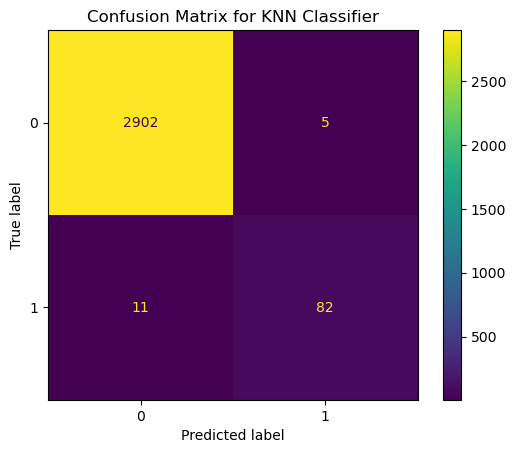

C:\Users\kevin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


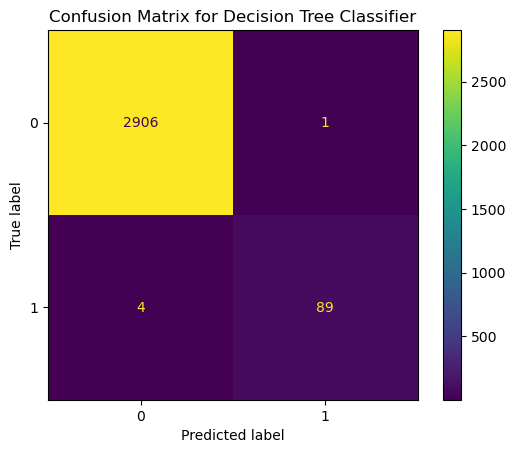

In [10]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Plot the confusion matrix for KNN classifier
plot_confusion_matrix(knn, X_test, y_test)
plt.title('Confusion Matrix for KNN Classifier')
plt.show()

# Plot the confusion matrix for Decision Tree classifier
plot_confusion_matrix(dt_classifier, X_test, y_test)
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()


C:\Users\kevin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


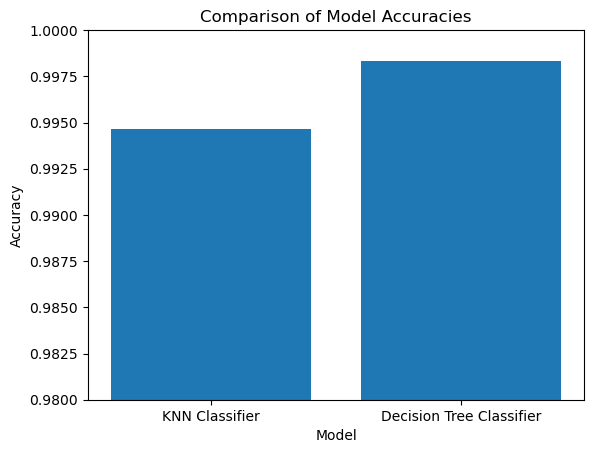

In [11]:
# Get the predictions of the KNN classifier on the test data
knn_predictions = knn.predict(X_test)

# Calculate the accuracy of the KNN classifier
knn_accuracy = accuracy_score(y_test, knn_predictions)

# Get the predictions of the Decision Tree classifier on the test data
dt_predictions = dt_classifier.predict(X_test)

# Calculate the accuracy of the Decision Tree classifier
dt_accuracy = accuracy_score(y_test, dt_predictions)

# Create a bar chart to compare the accuracies of the models
models = ['KNN Classifier', 'Decision Tree Classifier']
accuracies = [knn_accuracy, dt_accuracy]

plt.bar(models, accuracies)
plt.title('Comparison of Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.98, 1.0)
plt.show()

